<h1 style='background:orange; border:3; color:cyan; border-color:cyan; border-style:dashed;'><center> BTK DATATHON</center></h1> 

<center>
<img style="align:center;" src="https://assets-btkakademi-gov-tr.akamaized.net/api/gallery/51/b7ffad66-04a1-4227-9db2-865a87ada5a6/datathon+2023_BANNER.png?t=1689860501481" width=900>
</center>

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center> TABLE OF CONTENT</center></h1> 


<a id='1' style="color:cyan ">1. IMPORTING LIBRARIES</a>

<a id='2' style="color:cyan ">2. LOADING DATASET</a>

<a id='3' style="color:cyan ">3. DATA DESCRIPTION</a>

<a id='4' style="color:cyan ">4. EXPLORATORY DATA ANALYSIS</a>

<a id='5' style="color:cyan ">5. MISSING VALUES</a>

<a id='6' style="color:cyan ">6. FEATURE ENGINEERING</a>

<a id='7' style="color:cyan ">7. DATA VISUALIZATION</a>

<a id='8' style="color:cyan ">8. OUTLIER DETECTION</a>

<a id='9' style="color:cyan ">9. DATA PREPROCESSING</a>

<a id='10' style="color:cyan ">10. MODEL TRAINING AND EVALUATING</a>

<a id='11' style="color:cyan ">11. FEATURE IMPORTANCE</a>

<a id='12' style="color:cyan ">12 AUC-ROC</a>

<a id='13' style="color:cyan ">13. MODEL TUNING</a>

<a id='14' style="color:cyan ">14. SUBMISSION</a>

<a id='15' style="color:cyan ">15. CONCLUSION</a>               
</div>



<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center> IMPORTING LIBRARIES</center></h1> 

In [59]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center> LOADING DATASET</center></h1>

In [2]:
data=pd.read_csv("train.csv")
df=data.copy()
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'orange',
                            'border-color': 'white'})

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center> DATASET DESCRIPTION</center></h1>

### Veri içerisinde bulunan sütunların açıklamaları

* İndex
* Cinsiyet
* Yaş Grubu
* Medeni Durum
* Eğitim Düzeyi
* İstihdam Durumu
* Yıllık Ortalama Gelir
* Yaşadığı Şehir
* En Çok İlgilendiği Ürün Grubu
* Yıllık Ortalama Satın Alım Miktarı
* Yıllık Ortalama Sipariş Verilen Ürün Adedi
* Eğitime Devam Etme Durumu
* Yıllık Ortalama Sepete Atılan Ürün Adedi
* Öbek İsmi - Tahmin edilecek olan etiket

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center> EXPLORATORY DATA ANALYSIS</center></h1>

In [3]:
# 1. Exploratory Data Analysis:

def check_df(df):
    print("##################### Shape #####################")
    print(df.shape)
    print("##################### Types #####################")
    print(df.dtypes)
    print("##################### Head #####################")
    print(df.head(3))
    print("##################### Tail #####################")
    print(df.tail(3))
    print("##################### Null values #####################")
    print(df.isnull().sum())
    print("##################### Quantiles #####################")
    print(df.describe().T)
    print("##################### Unique #####################")
    print(df.nunique())
    print("##################### Columns #####################")
    print(df.columns)

check_df(df)

##################### Shape #####################
(5460, 14)
##################### Types #####################
index                                           int64
Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum                                   object
Eğitim Düzeyi                                  object
İstihdam Durumu                                object
Yıllık Ortalama Gelir                         float64
Yaşadığı Şehir                                 object
En Çok İlgilendiği Ürün Grubu                  object
Yıllık Ortalama Satın Alım Miktarı            float64
Yıllık Ortalama Sipariş Verilen Ürün Adedi    float64
Eğitime Devam Etme Durumu                      object
Öbek İsmi                                      object
Yıllık Ortalama Sepete Atılan Ürün Adedi      float64
dtype: object
##################### Head #####################
   index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5460 non-null   int64  
 1   Cinsiyet                                    5460 non-null   object 
 2   Yaş Grubu                                   5460 non-null   object 
 3   Medeni Durum                                5460 non-null   object 
 4   Eğitim Düzeyi                               5460 non-null   object 
 5   İstihdam Durumu                             5460 non-null   object 
 6   Yıllık Ortalama Gelir                       5460 non-null   float64
 7   Yaşadığı Şehir                              5460 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 10  Yıllık Ortal

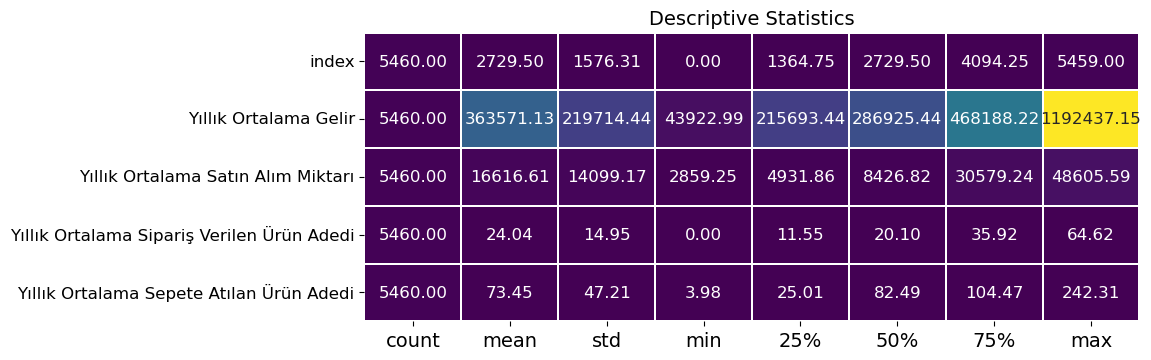

In [5]:
# describe stats of the data
cols=df.select_dtypes(include=['float64','int64'])
cmap1 = 'viridis'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [6]:
# grabbing numeric and categorical columns:
def cat_num_cols(dataframe,cat_th=12,car_th=20):
    
    # categorical columns
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes=="O"]
    
    # numerical columns
    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes!="O"]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
 
    
    return cat_cols,num_cols

cat_cols,num_cols=cat_num_cols(df)

Observations: 5460
Variables: 14
cat_cols: 9
num_cols: 5


In [7]:
# distribution of categorical variables
colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']


def cat_summary(dataframe, col):
    print(pd.DataFrame({col:df[col].value_counts(),
                       "Ratio":100*df[col].value_counts()/len(df)}))

    fig = make_subplots(rows=1,cols=1,
                        subplot_titles=('Distribution'))
    fig.add_trace(go.Bar(x=dataframe[col].value_counts().index,
                            y=dataframe[col].value_counts().values,
                            marker=dict(color=colors)),row=1,col=1)
    
    
  
    fig.update_layout(title = {'text': col,
                               'y':0.9,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                      template = "plotly_dark",width=400,height=400)
    
    iplot(fig) # to show the plot in notebook with optimized design

for i in cat_cols:
    cat_summary(df,i)

          Cinsiyet  Ratio
Cinsiyet                 
Erkek         2964  54.29
Kadın         2496  45.71


           Yaş Grubu  Ratio
Yaş Grubu                  
18-30           1841  33.72
31-40           1477  27.05
51-60            861  15.77
41-50            727  13.32
>60              554  10.15


              Medeni Durum  Ratio
Medeni Durum                     
Evli                  2834  51.90
Bekar                 2626  48.10


                      Eğitim Düzeyi  Ratio
Eğitim Düzeyi                             
Lise Mezunu                    1388  25.42
Üniversite Mezunu              1257  23.02
Yüksekokul Mezunu               588  10.77
Yüksek Lisans Mezunu            545   9.98
İlkokul Mezunu                  417   7.64
Ortaokul Mezunu                 412   7.55
Eğitimsiz                       381   6.98
Doktora Mezunu                  263   4.82
Doktora Ötesi                   209   3.83


                                İstihdam Durumu  Ratio
İstihdam Durumu                                       
Düzenli ve Ücretli Bir İşi Var             2768  50.70
İşsiz veya Düzenli Bir İşi Yok             1349  24.71
Kendi İşinin Sahibi                         879  16.10
Emekli                                      464   8.50


                 Yaşadığı Şehir  Ratio
Yaşadığı Şehir                        
Büyük Şehir                1959  35.88
Küçük Şehir                1842  33.74
Köy veya Kasaba            1092  20.00
Kırsal                      567  10.38


                                  En Çok İlgilendiği Ürün Grubu  Ratio
En Çok İlgilendiği Ürün Grubu                                         
Giyim                                                      1487  27.23
Ev ve Mobilya                                              1114  20.40
Elektronik ve Teknolojik Ürünler                           1029  18.85
Spor Malzemeleri                                           1001  18.33
Kozmetik                                                    829  15.18


                           Eğitime Devam Etme Durumu  Ratio
Eğitime Devam Etme Durumu                                  
Etmiyor                                         4554  83.41
Ediyor                                           906  16.59


           Öbek İsmi  Ratio
Öbek İsmi                  
obek_4           720  13.19
obek_8           717  13.13
obek_5           706  12.93
obek_3           695  12.73
obek_7           695  12.73
obek_1           692  12.67
obek_6           688  12.60
obek_2           547  10.02


In [8]:

# distribution of the numerical variables
colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']


def num_summary(dataframe, col):

    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Quantiles','Distribution'))

    fig.add_trace(go.Histogram(x = dataframe[col],
                               xbins = dict(start = dataframe[col].min(),
                                            end = dataframe[col].max()),
                               showlegend = False,
                               name = str(col),
                               marker=dict(color=colors[8],
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 1)
    
    fig.add_trace(go.Box(y=dataframe[col],
                         name = str(col),
                         showlegend = False,
                         marker_color = colors[3]),
                  row = 1, col = 2)
    
    
  
    fig.update_layout(title = {'text': col,
                               'y':0.9,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                      template = "plotly_dark")
    
    iplot(fig)

for i in num_cols:
    num_summary(df,i)

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>FILLING MISSING VALUES
</center></h1>

In [9]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

# There is no missing value in the dataset

Empty DataFrame
Columns: [n_miss, ratio]
Index: []

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>FEATURE EXTRACTION</center></h1>

In [10]:
#Yıl Sonu Bütçe Durumu:
df["Yıl Sonu Bütçe Durumu"]=df["Yıllık Ortalama Gelir"]-df["Yıllık Ortalama Satın Alım Miktarı"]

#Yıllık Sepet-Sipariş oranı:
df["Yıllık Sepet-Sipariş oranı"]=(df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"]/df["Yıllık Ortalama Sepete Atılan Ürün Adedi"])*100

#Aylık sipariş Verilen ürün adedi:
df["Aylık sipariş Verilen ürün adedi"]=df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"]/12

#Aylık Sepete Atılan Ürün Adedi:
#df["Yıllık Ortalama Alınan Ürün fiyatı"]=df["Yıllık Ortalama Satın Alım Miktarı"]/df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"]
df.head()


index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1      1    Erkek       >60         Evli           Lise Mezunu   
2      2    Erkek     18-30        Bekar           Lise Mezunu   
3      3    Erkek     51-60         Evli           Lise Mezunu   
4      4    Erkek     31-40         Evli       Ortaokul Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var              748266.44    Büyük Şehir   
1             Kendi İşinin Sahibi              246298.61    Küçük Şehir   
2  Düzenli ve Ücretli Bir İşi Var              268582.73    Küçük Şehir   
3             Kendi İşinin Sahibi              327721.84         Kırsal   
4  İşsiz veya Düzenli Bir İşi Yok              397431.63    Büyük Şehir   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0  Elektronik ve Teknolojik Ürünler                            32010.90   
1                  Spor Malzemeleri                             4145.73   
2                             Giyim                             9924.38   
3                             Giyim                             6417.78   
4                             Giyim                             7886.66   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                       37.31                   Etmiyor   
1                                       11.55                   Etmiyor   
2                                       55.35                    Ediyor   
3                                       15.42                   Etmiyor   
4                                       14.69                   Etmiyor   

  Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  Yıl Sonu Bütçe Durumu  \
0    obek_4                                    102.94              716255.54   
1    obek_5                                     82.18              242152.88   
2    obek_8                                    141.66              258658.35   
3    obek_3                                     17.10              321304.06   
4    obek_3                                     20.47              389544.96   

   Yıllık Sepet-Sipariş oranı  Aylık sipariş Verilen ürün adedi  
0                       36.25                              3.11  
1                       14.06                              0.96  
2                       39.07                              4.61  
3                       90.17                              1.28  
4                       71.76                              1.22

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>DATA VISUALIZATION</center></h1>

Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 4000x2000 with 0 Axes>

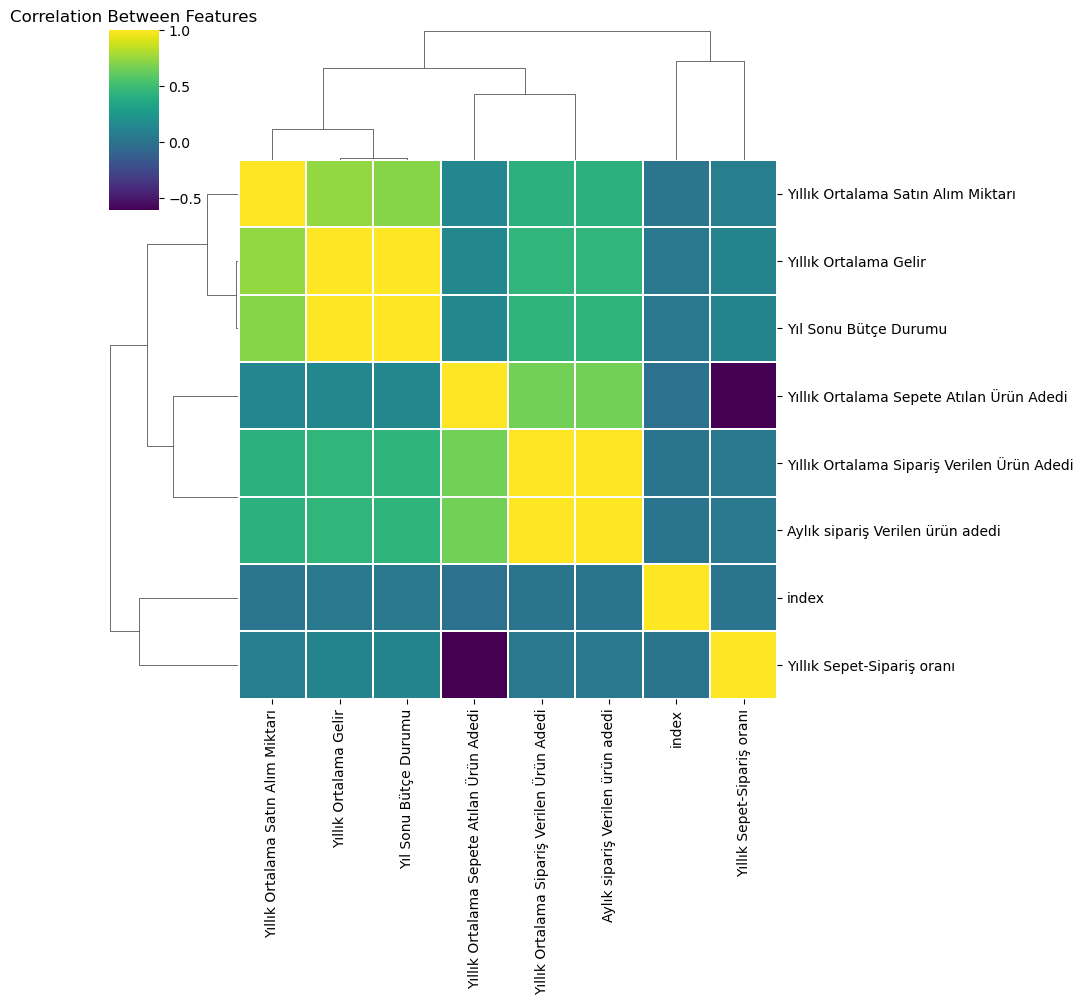

In [11]:
# check the correlation between the features
num_cols=[col for col in df.columns if df[col].dtypes!="O"]

# correlation matrix:
corr=df[num_cols].corr()
plt.figure(figsize=(40,20))
sns.clustermap(corr,cmap="viridis",linewidths=0.3,fmt=".2f")
plt.title("Correlation Between Features")

Text(0.5, 1.0, 'Distribution of all Variables')

<Figure size 2000x2000 with 0 Axes>

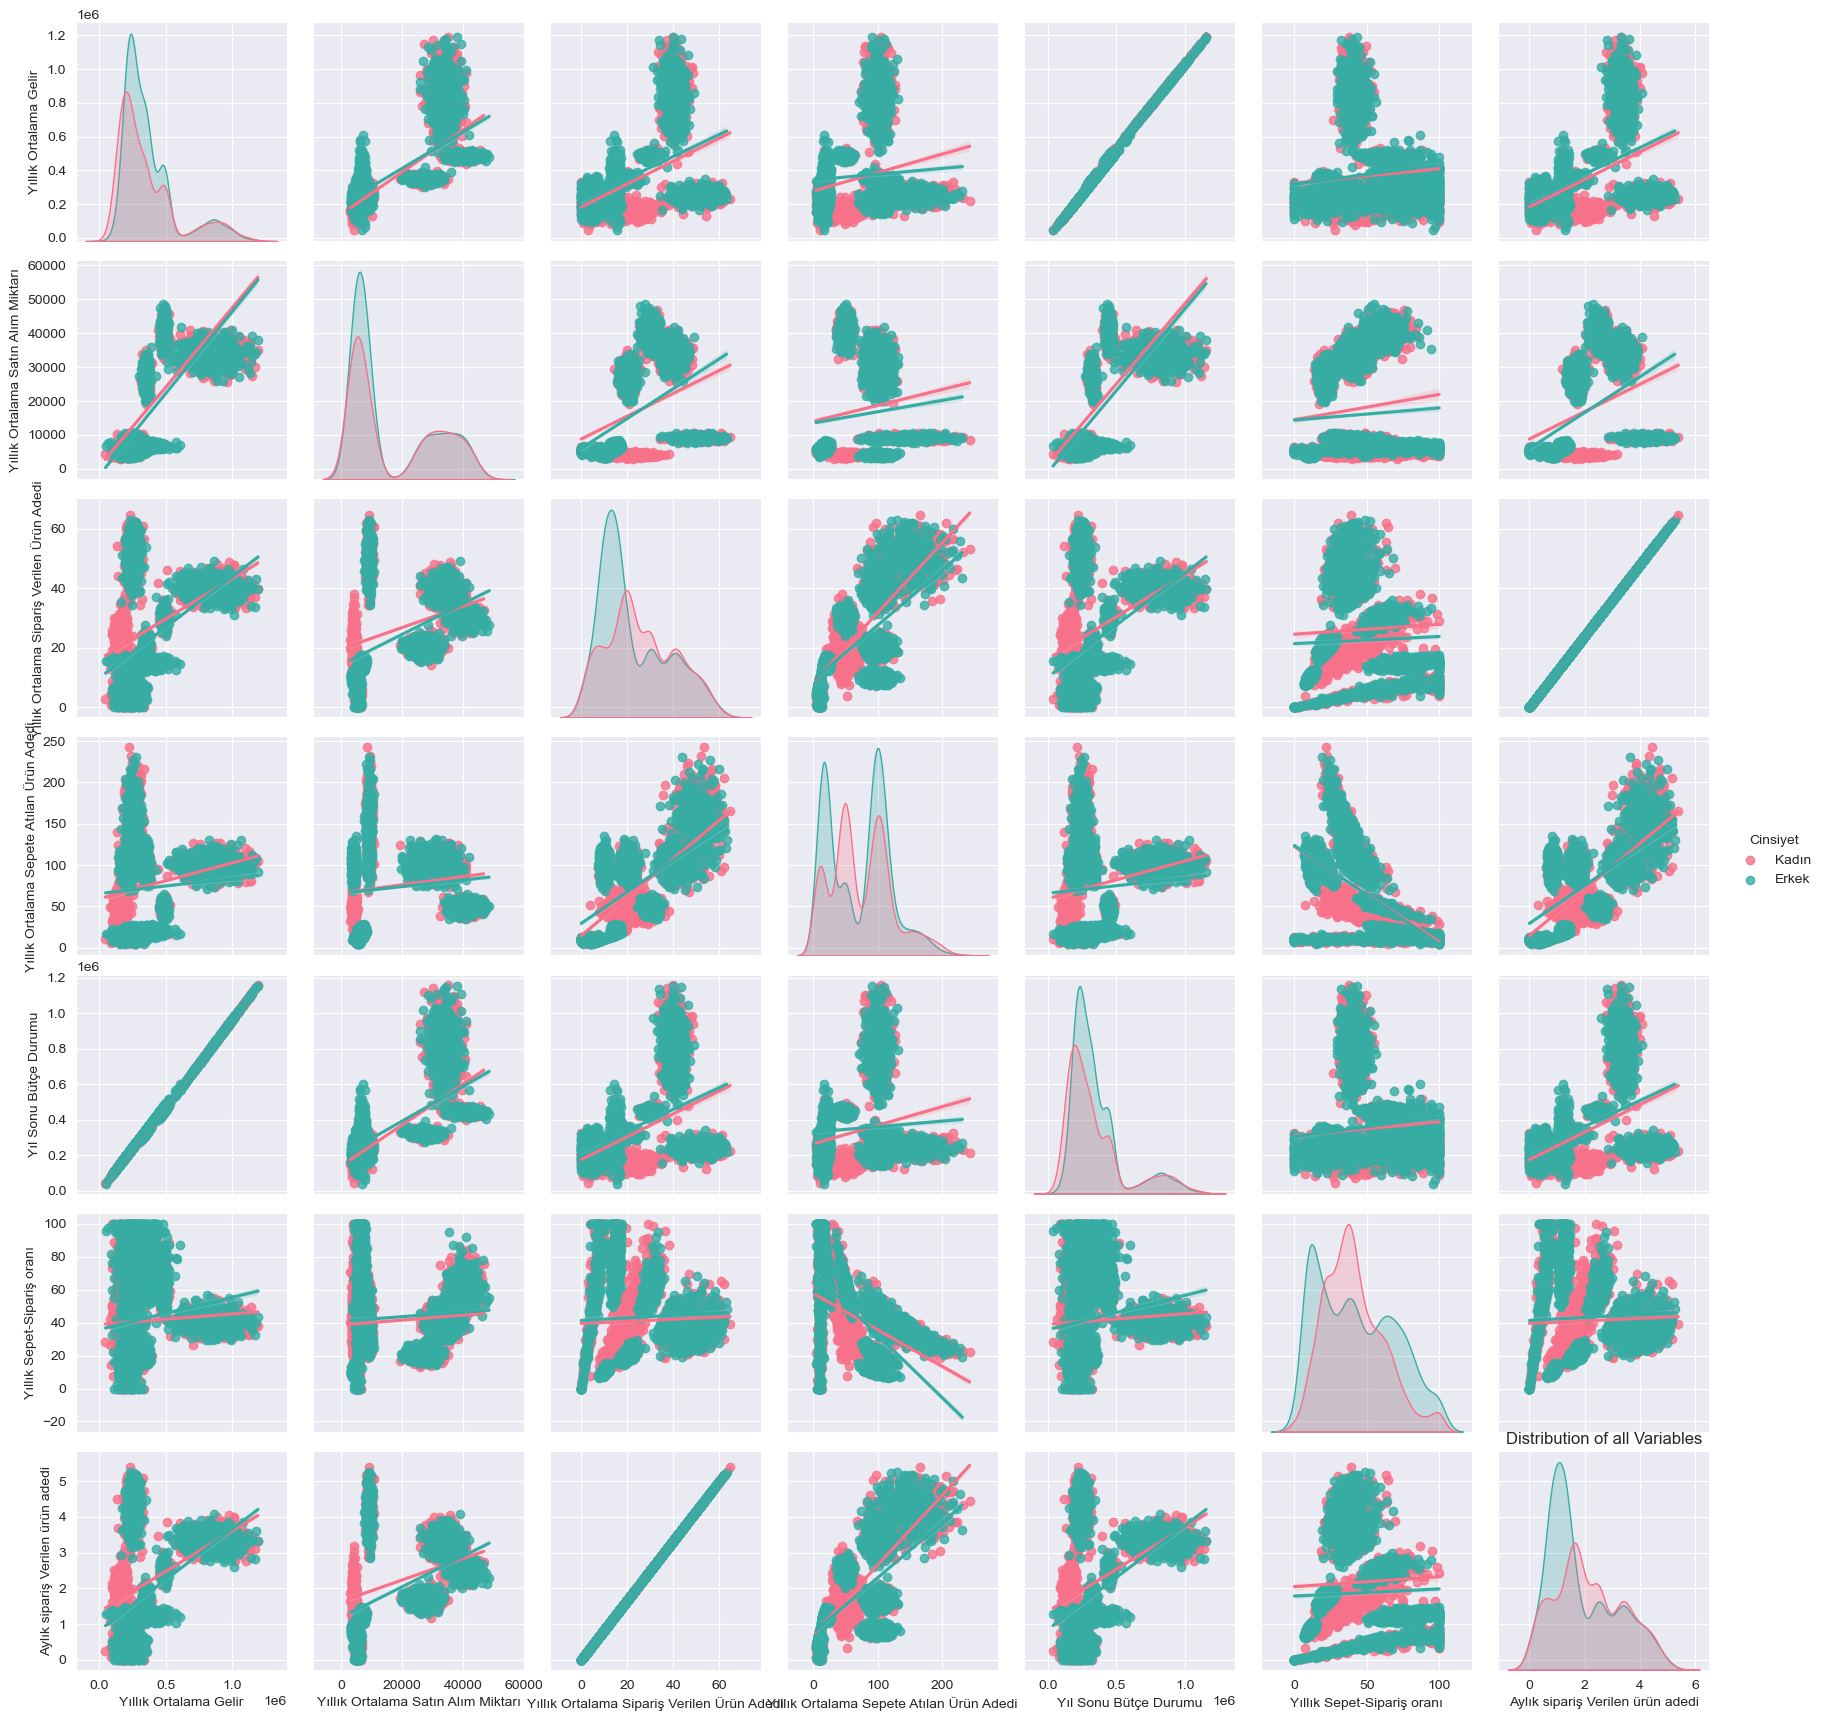

In [12]:
# pairplot of the selected features


plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
sns.pairplot(df.drop("index",axis=1),kind="reg",diag_kind="kde",palette="husl",hue="Cinsiyet");
plt.title("Distribution of all Variables")

In [13]:
# cinsiyet, eğitim ve yıllık ortalama gelir grafiği:

px.histogram(df,x="Eğitim Düzeyi",y="Yıllık Ortalama Gelir",color="Cinsiyet",title="Cinsiyet ve Yıllık Ortalama Gelir Grafiği",template="plotly_dark",
       width=800,height=400,hover_data=["Yıllık Ortalama Gelir"],barmode="group")

In [14]:
# aylık sipariş verilen ürün adedi ve eğitim düzeyi grafiği:


a=pd.DataFrame(df.groupby(["Eğitim Düzeyi"])["Aylık sipariş Verilen ürün adedi"].mean()).reset_index()


fig=px.scatter(a,x="Eğitim Düzeyi",y="Aylık sipariş Verilen ürün adedi",color="Eğitim Düzeyi",title="Eğitim Düzeyi ve Aylık sipariş Verilen ürün adedi Grafiği",template="plotly_dark",
           size="Aylık sipariş Verilen ürün adedi",size_max=50,hover_data=["Aylık sipariş Verilen ürün adedi"])
fig.show()

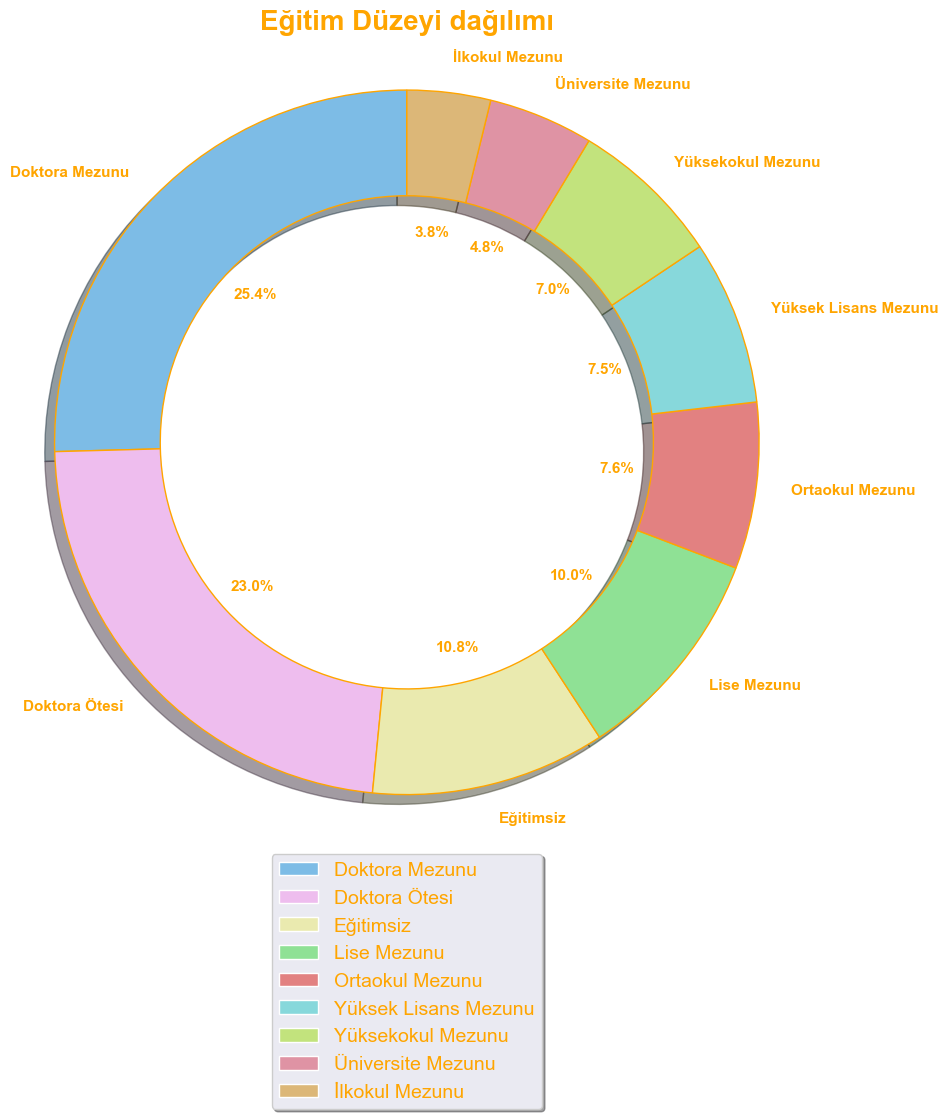

In [29]:
# eğitim düzeyi dağılımı:
import matplotlib.patches as mpatches


b=pd.DataFrame(df["Eğitim Düzeyi"].value_counts()).reset_index()
b["Sayı"]=b["count"]
b.drop("count",axis=1,inplace=True)


# 9 different colors for 9 different  labels
colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
             '#87D8DB','#C2E37D','#DF93A4','#DCB778']


# # Create the pie chart
plt.figure(figsize=(10, 10))  # Set the figure size

# Plot the pie chart with customizations
wedges, texts, autotexts = plt.pie(b["Sayı"],  labels=a['Eğitim Düzeyi'], colors=colors,
                                   autopct='%1.1f%%', startangle=90, shadow=True,
                                   wedgeprops=dict(width=0.3, edgecolor='orange'))

# Add a title
plt.title('Eğitim Düzeyi dağılımı', fontsize=20, fontweight='bold', pad=20,color='orange')

# Customize font style for text and percentage labels
for text in texts + autotexts:
    text.set_fontsize(11)
    text.set_fontweight('semibold')
    text.set_color('orange')

# Create a legend with custom labels and colors
legend_labels = ['{}'.format(label) for label in a['Eğitim Düzeyi']]

# pick color randomly for each label
legend_colors = [mpatches.Patch(facecolor=color) for color in colors]
leg=plt.legend(legend_colors, legend_labels, loc='center', bbox_to_anchor=(0.5, -0.2),
            fontsize=14, title_fontsize=16, fancybox=True, shadow=True)
for text in leg.get_texts():
    text.set_color("orange")

# Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()





In [30]:
# medeni durum ve yıllık sepet-sipariş oranı grafiği:

a=pd.DataFrame(df.groupby(["Medeni Durum"])["Yıllık Sepet-Sipariş oranı"].mean()).reset_index()

fig=px.bar(a,x="Medeni Durum",y="Yıllık Sepet-Sipariş oranı",color="Medeni Durum",title="Medeni Durum ve Yıllık Sepet-Sipariş oranı Grafiği",template="plotly_dark",
              hover_data=["Yıllık Sepet-Sipariş oranı"],width=600,height=600,text="Yıllık Sepet-Sipariş oranı")
fig.show()

In [31]:
#cinsiyet ve yıllık ortalama gelir grafiği:

a=pd.DataFrame(df.groupby(["Cinsiyet"])["Yıllık Ortalama Gelir"].mean()).reset_index()

fig=px.bar(a,x="Cinsiyet",y="Yıllık Ortalama Gelir",color="Cinsiyet",title="Cinsiyet ve Yıllık Ortalama Gelir Grafiği",template="plotly_dark",
                hover_data=["Yıllık Ortalama Gelir"],width=600,height=600,text="Yıllık Ortalama Gelir")
fig.show()

In [32]:
# yaşadığı şehir ve yıllık ortalama alım miktarı grafiği:

a=pd.DataFrame(df.groupby(["Yaşadığı Şehir"])["Yıllık Ortalama Satın Alım Miktarı"].mean()).reset_index()

fig=px.bar(a,x="Yaşadığı Şehir",y="Yıllık Ortalama Satın Alım Miktarı",color="Yaşadığı Şehir",title="Yaşadığı Şehir ve Yıllık Ortalama Satın Alım Miktarı Grafiği",template="plotly_dark",
                hover_data=["Yıllık Ortalama Satın Alım Miktarı"],width=600,height=600,text="Yıllık Ortalama Satın Alım Miktarı")
fig.show()

In [33]:
# istihdam durumu ve yıllık ortalama satın alım durumu grafiği:
a=pd.DataFrame(df.groupby(["İstihdam Durumu"])["Yıllık Ortalama Satın Alım Miktarı"].mean()).reset_index()

fig=px.bar(a,x="İstihdam Durumu",y="Yıllık Ortalama Satın Alım Miktarı",color="İstihdam Durumu",title="İstihdam Durumu ve Yıllık Ortalama Satın Alım Miktarı Grafiği",template="plotly_dark",
                hover_data=["Yıllık Ortalama Satın Alım Miktarı"],width=600,height=600,text="Yıllık Ortalama Satın Alım Miktarı")
fig.show()

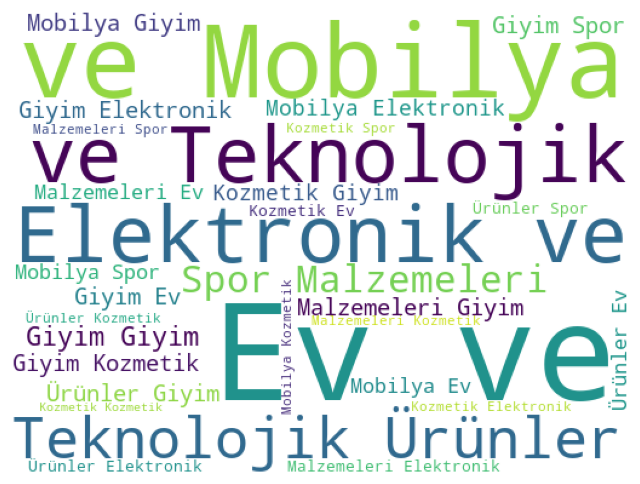

In [34]:
# en çok ilgi duyulan ürünler grafiği:

from wordcloud import WordCloud
ov=df["En Çok İlgilendiği Ürün Grubu"].values



plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white',width=512,height=384).generate(" ".join(ov))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>OUTLIER DETECTION</center></h1>

In [35]:
# showing outliers with boxplot in the dataset

for i in df[num_cols].columns:
    fig=px.box(df,y=i,color=df["Eğitim Düzeyi"],title=i,width=900,height=500,template="plotly_dark")
    fig.show()

In [36]:
# Aykırı değer analizi:
# df.drop("index",axis=1,inplace=True)

num_cols=[col for col in df.columns if df[col].dtypes!="O" and col not in "index"]

# #  outlier threshold:
def outlier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
    q1=dataframe[col_name].quantile(q1)
    q3=dataframe[col_name].quantile(q3)
    IQR=q3-q1
    
    up_limit=q3+1.5*IQR
    low_limit=q1-1.5*IQR
    
    return low_limit,up_limit

# # check outliers:
# # eğer değişkende aykırı değer varsa True döndürür, yoksa False döndürür.
def check_outliers(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]<low_limit) | (dataframe[col_name]>up_limit)].any(axis=None):
         return True 
   
    else:
         return False
    
def replace_with_thresholds(dataframe, col):
    low_limit, up_limit = outlier_thresholds(dataframe, col)
    if low_limit > 0:
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
    else:
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit   
        
for col in num_cols:
     print(col, check_outliers(df, col))

for col in num_cols:
    replace_with_thresholds(df, col)
    print(col, check_outliers(df, col))


Yıllık Ortalama Gelir False
Yıllık Ortalama Satın Alım Miktarı False
Yıllık Ortalama Sipariş Verilen Ürün Adedi False
Yıllık Ortalama Sepete Atılan Ürün Adedi False
Yıl Sonu Bütçe Durumu False
Yıllık Sepet-Sipariş oranı False
Aylık sipariş Verilen ürün adedi False
Yıllık Ortalama Gelir False
Yıllık Ortalama Satın Alım Miktarı False
Yıllık Ortalama Sipariş Verilen Ürün Adedi False
Yıllık Ortalama Sepete Atılan Ürün Adedi False
Yıl Sonu Bütçe Durumu False
Yıllık Sepet-Sipariş oranı False
Aylık sipariş Verilen ürün adedi False


<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>FEATURE ENGINEERING</center></h1>

In [37]:
# LABEL ENCODING:
df=df.drop("Öbek İsmi",axis=1)

def label_encoder(df, column_name):
    if df[column_name].dtype == 'object':
        if df[column_name].nunique() <= 2:
            le = LabelEncoder()
            df[column_name] = le.fit_transform(df[column_name])
            return df
        elif df[column_name].nunique() > 2  and df[column_name].nunique() <= 10:
            ohe = OneHotEncoder()
            ohe_df = pd.DataFrame(ohe.fit_transform(df[[column_name]]).toarray())
            ohe_df.columns = [column_name + "_" + str(i) for i in ohe_df.columns]
            df = df.join(ohe_df)
            df = df.drop(column_name, axis=1)
            return df
        else:
            return df
        
    else:
        return df
    

for i in df.columns:
    df = label_encoder(df, i)
    
df.head()

index  Cinsiyet  Medeni Durum  Yıllık Ortalama Gelir  \
0      0         1             0              748266.44   
1      1         0             1              246298.61   
2      2         0             0              268582.73   
3      3         0             1              327721.84   
4      4         0             1              397431.63   

   Yıllık Ortalama Satın Alım Miktarı  \
0                            32010.90   
1                             4145.73   
2                             9924.38   
3                             6417.78   
4                             7886.66   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                       37.31                          1   
1                                       11.55                          1   
2                                       55.35                          0   
3                                       15.42                          1   
4                                       14.69                          1   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  Yıl Sonu Bütçe Durumu  \
0                                    102.94              716255.54   
1                                     82.18              242152.88   
2                                    141.66              258658.35   
3                                     17.10              321304.06   
4                                     20.47              389544.96   

   Yıllık Sepet-Sipariş oranı  Aylık sipariş Verilen ürün adedi  Yaş Grubu_0  \
0                       36.25                              3.11         0.00   
1                       14.06                              0.96         0.00   
2                       39.07                              4.61         1.00   
3                       90.17                              1.28         0.00   
4                       71.76                              1.22         0.00   

   Yaş Grubu_1  Yaş Grubu_2  Yaş Grubu_3  Yaş Grubu_4  Eğitim Düzeyi_0  \
0         1.00         0.00         0.00         0.00             0.00   
1         0.00         0.00         0.00         1.00             0.00   
2         0.00         0.00         0.00         0.00             0.00   
3         0.00         0.00         1.00         0.00             0.00   
4         1.00         0.00         0.00         0.00             0.00   

   Eğitim Düzeyi_1  Eğitim Düzeyi_2  Eğitim Düzeyi_3  Eğitim Düzeyi_4  \
0             0.00             0.00             0.00             0.00   
1             0.00             0.00             1.00             0.00   
2             0.00             0.00             1.00             0.00   
3             0.00             0.00             1.00             0.00   
4             0.00             0.00             0.00             1.00   

   Eğitim Düzeyi_5  Eğitim Düzeyi_6  Eğitim Düzeyi_7  Eğitim Düzeyi_8  \
0             1.00             0.00             0.00             0.00   
1             0.00             0.00             0.00             0.00   
2             0.00             0.00             0.00             0.00   
3             0.00             0.00             0.00             0.00   
4             0.00             0.00             0.00             0.00   

   İstihdam Durumu_0  İstihdam Durumu_1  İstihdam Durumu_2  İstihdam Durumu_3  \
0               1.00               0.00               0.00               0.00   
1               0.00               0.00               1.00               0.00   
2               1.00               0.00               0.00               0.00   
3               0.00               0.00               1.00               0.00   
4               0.00               0.00               0.00               1.00   

   Yaşadığı Şehir_0  Yaşadığı Şehir_1  Yaşadığı Şehir_2  Yaşadığı Şehir_3  \
0              1.00              0.00              0.00              0.00   
1              0.00              0.00              1.00              0.00   
2

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>DATA PREPROCESSING</center></h1>

In [38]:
# standardization ve normalization işlemleri:

rb=RobustScaler()
df=rb.fit_transform(df)

In [39]:
# Boyut azaltma işlemi:

pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df)
reduced_data = pd.DataFrame(reduced_data,columns = ['PC1', 'PC2',"PC3"])
reduced_data.head()

PC1   PC2   PC3
0  2.62 -0.09 -0.94
1 -1.27 -0.08 -0.73
2  0.13  2.19  0.50
3 -0.77 -1.44  0.92
4 -0.19 -1.19  0.15

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>CLUSTURING</center></h1>

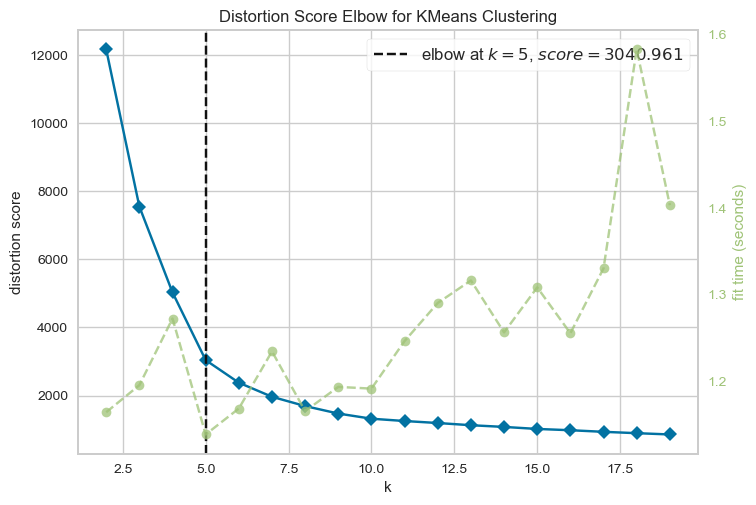

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
# ideal öbek sayısını KMeans ile bulma:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans=KMeans()
elbow=KElbowVisualizer(kmeans,k=(2,20))
elbow.fit(reduced_data)
elbow.show()

* Elbow methoduna göre ideal öbek sayısı 6 olarak belirlenmiştir.
* Bu analizin sonucunda öbekleri en iyi temsil edecek olan tanımlamanın kredi skoru olduğuna karar verdim.

In [41]:

# k=6 olarak belirlendi:
from sklearn.cluster import KMeans, AgglomerativeClustering

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=8)
clusters = AC.fit_predict(reduced_data)

#Adding the Clusters feature to the orignal dataframe.
data2=pd.read_csv("train.csv")
df1=data2.copy()
reduced_data["Clusters"]=clusters
df1["Clusters"]=clusters
reduced_data.head()

PC1   PC2   PC3  Clusters
0  2.62 -0.09 -0.94         0
1 -1.27 -0.08 -0.73         4
2  0.13  2.19  0.50         6
3 -0.77 -1.44  0.92         2
4 -0.19 -1.19  0.15         2

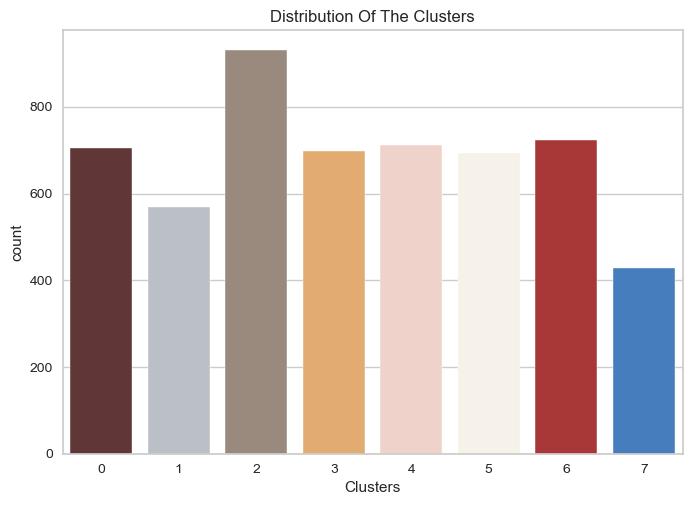

In [42]:
# Öbekleri değerlendirme ve yorumlama:

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#F5D0C5","#F9F2E7","#BB2525","#337CCF"]
pl = sns.countplot(x=df1["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

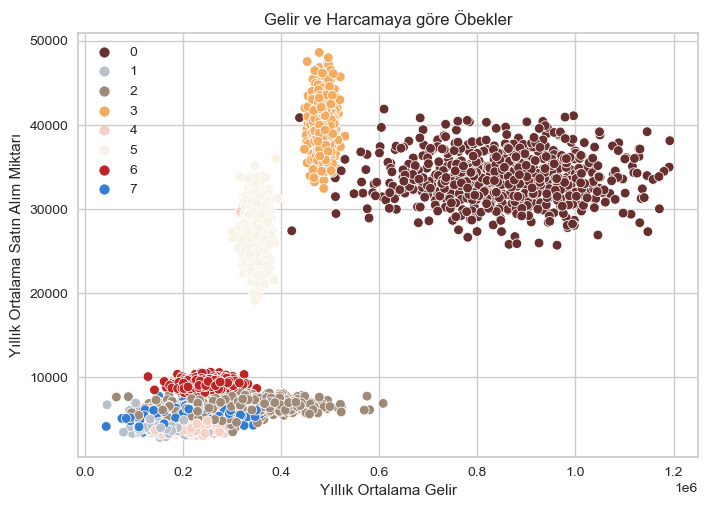

In [43]:
pl = sns.scatterplot(data = df1,x=df1["Yıllık Ortalama Gelir"], y=df1["Yıllık Ortalama Satın Alım Miktarı"],hue=df1["Clusters"], palette= pal)
pl.set_title("Gelir ve Harcamaya göre Öbekler")
plt.xlabel("Yıllık Ortalama Gelir")
plt.ylabel("Yıllık Ortalama Satın Alım Miktarı")
plt.legend()
plt.show()

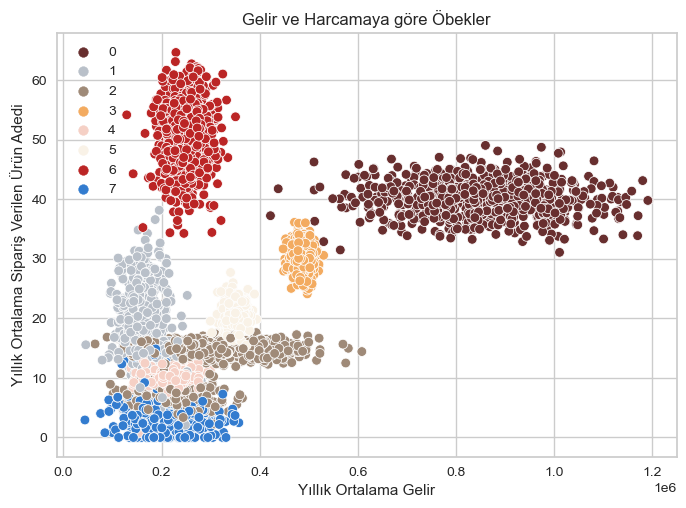

In [44]:
pl = sns.scatterplot(data = df1,x=df1["Yıllık Ortalama Gelir"], y=df1["Yıllık Ortalama Sipariş Verilen Ürün Adedi"],hue=df1["Clusters"], palette= pal)
pl.set_title("Gelir ve Harcamaya göre Öbekler")
plt.xlabel("Yıllık Ortalama Gelir")
plt.ylabel("Yıllık Ortalama Sipariş Verilen Ürün Adedi")
plt.legend()
plt.show()

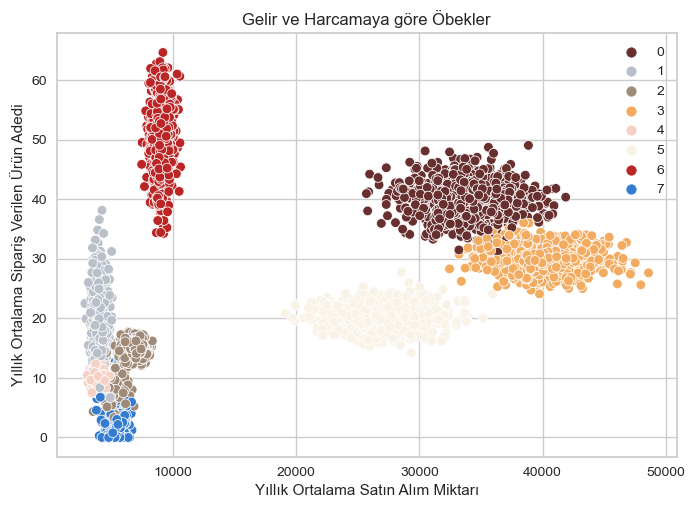

In [45]:
pl = sns.scatterplot(data = df1,x=df1["Yıllık Ortalama Satın Alım Miktarı"], y=df1["Yıllık Ortalama Sipariş Verilen Ürün Adedi"],hue=df1["Clusters"], palette= pal)
pl.set_title("Gelir ve Harcamaya göre Öbekler")
plt.xlabel("Yıllık Ortalama Satın Alım Miktarı")
plt.ylabel("Yıllık Ortalama Sipariş Verilen Ürün Adedi")
plt.legend()
plt.show()

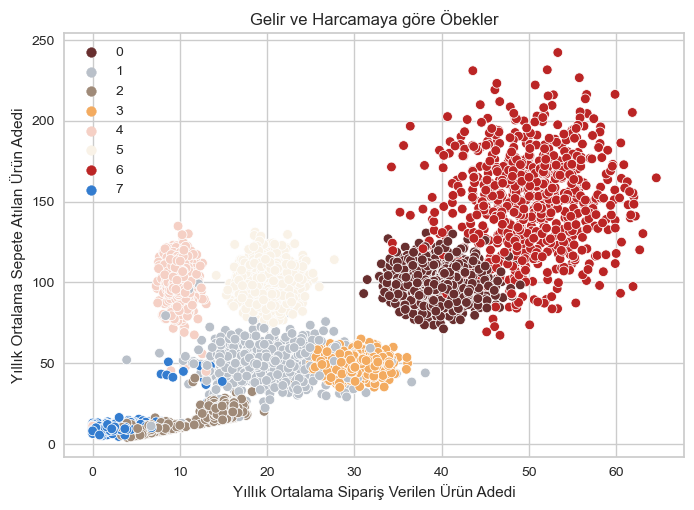

In [46]:
pl = sns.scatterplot(data = df1,x=df1["Yıllık Ortalama Sipariş Verilen Ürün Adedi"], y=df1["Yıllık Ortalama Sepete Atılan Ürün Adedi"],hue=df1["Clusters"], palette= pal)
pl.set_title("Gelir ve Harcamaya göre Öbekler")
plt.xlabel("Yıllık Ortalama Sipariş Verilen Ürün Adedi")
plt.ylabel("Yıllık Ortalama Sepete Atılan Ürün Adedi")
plt.legend()
plt.show()

# Oluşturulan grafiğe göre:
* 1. Öbek: Ortalama harcama,ortalama altı gelir ,ortalama altı sipariş verme, ortalama üstü değerde ürünler alma,ortalama alışveriş isteği
* 2. Öbek: Yüksek harcama, orta-yüksek gelir,ortalama üstü sipariş verme,ortalama altı ürünler alma,ortalama alışveriş isteği
* 3. Öbek: düşük harcama,düşük gelir,çok düşük sipariş  verme, düşük değerde ürünler alma,çok düşük girişim isteği
* 4. Öbek: çok yükesek harcama ,ortalama gelir, ortalama sipariş verme,ortalama değerde ürün alma, düşük girişim isteği
* 5. Öbek: Çok düşük harcama,düşük gelir,ortalama altı sipariş verme, çok düşük değerde ürün alma,ortalama altı girişim isteği
* 6. Öbek: düşük üstü harcama,düşük gelir ,çok yüksek sipariş verme, çok düşük değerde ürün alma,yüksek girişim isteği

Bu bilgilerin sonucunda :

* 1. Öbek: Orta gelir-Orta istek müşteri
* 2. Öbek: Yüksek gelir-Orta istek müşteri
* 3. Öbek: Düşük gelir-Düşük istek müşteri
* 4. Öbek: Orta gelir-Düşük istek müşteri
* 5. Öbek: Düşük gelir-Orta istek müşteri
* 6. Öbek: Düşük gelir-Yüksek istek müşteri


In [47]:
# Mevcut öbek isimlerini yeni öbek isimleriyle değiştirme:

df1.drop("Öbek İsmi",axis=1,inplace=True)
df1.rename(columns={"Clusters":"Öbek İsmi"},inplace=True)
reduced_data.rename(columns={"Clusters":"Öbek İsmi"},inplace=True)

df1.head()


index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1      1    Erkek       >60         Evli           Lise Mezunu   
2      2    Erkek     18-30        Bekar           Lise Mezunu   
3      3    Erkek     51-60         Evli           Lise Mezunu   
4      4    Erkek     31-40         Evli       Ortaokul Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var              748266.44    Büyük Şehir   
1             Kendi İşinin Sahibi              246298.61    Küçük Şehir   
2  Düzenli ve Ücretli Bir İşi Var              268582.73    Küçük Şehir   
3             Kendi İşinin Sahibi              327721.84         Kırsal   
4  İşsiz veya Düzenli Bir İşi Yok              397431.63    Büyük Şehir   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0  Elektronik ve Teknolojik Ürünler                            32010.90   
1                  Spor Malzemeleri                             4145.73   
2                             Giyim                             9924.38   
3                             Giyim                             6417.78   
4                             Giyim                             7886.66   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                       37.31                   Etmiyor   
1                                       11.55                   Etmiyor   
2                                       55.35                    Ediyor   
3                                       15.42                   Etmiyor   
4                                       14.69                   Etmiyor   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  Öbek İsmi  
0                                    102.94          0  
1                                     82.18          4  
2                                    141.66          6  
3                                     17.10          2  
4                                     20.47          2

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>PREPARING DATA FOR CLASSIFICATION MODEL</center></h1>

In [48]:
def data_prep(df):
    
    #Yıl Sonu Bütçe Durumu:
    df["Yıl Sonu Bütçe Durumu"]=df["Yıllık Ortalama Gelir"]-df["Yıllık Ortalama Satın Alım Miktarı"]

    #Yıllık Sepet-Sipariş oranı:
    df["Yıllık Sepet-Sipariş oranı"]=(df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"]/df["Yıllık Ortalama Sepete Atılan Ürün Adedi"])*100

    #Aylık sipariş Verilen ürün adedi:
    df["Aylık sipariş Verilen ürün adedi"]=df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"]/12

    
    cat_cols=df.select_dtypes(include=['object','category','bool'])
    num_cols=df.select_dtypes(include=['float64','int64'])
    a1=0.05
    a3=0.95
    for col in num_cols:
        if col!="Öbek İsmi":
            q1=df[col].quantile(a1)
            q3=df[col].quantile(a3)
            IQR=q3-q1
    
            up_limit=q3+1.5*IQR
            low_limit=q1-1.5*IQR

            if df[(df[col]<low_limit) | (df[col]>up_limit)].any(axis=None):
                if low_limit > 0:
                    df.loc[(df[col] < low_limit), col] = low_limit
                    df.loc[(df[col] > up_limit), col] = up_limit
                else:
                    df.loc[(df[col] > up_limit), col] = up_limit
    
    for col in cat_cols.columns:
        if col!="Öbek İsmi":
            if df[col].nunique() <= 2:
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])
            elif df[col].nunique() > 2  and df[col].nunique() <= 10:
                ohe = OneHotEncoder()
                ohe_df = pd.DataFrame(ohe.fit_transform(df[[col]]).toarray())
                ohe_df.columns = [col + "_" + str(i) for i in ohe_df.columns]
                df = df.join(ohe_df)
                df = df.drop(col, axis=1)
    
    for i in df.columns:
        if i != "Öbek İsmi":
            rb=RobustScaler()
            df[i]=rb.fit_transform(df[[i]])
            
    return df



In [49]:
# target değişkeni ordinal encoding işlemi:

df1=data_prep(df1)

X=df1.drop("Öbek İsmi",axis=1).values
y=df1["Öbek İsmi"].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (4368, 38)
X_test shape:  (1092, 38)
y_train shape:  (4368, 1)
y_test shape:  (1092, 1)


<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>MODEL BUILDING AND EVALUATING</center></h1>

In [50]:
# MODELING:

knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
lr=LogisticRegression()

models = [knn, svc, nb, dtc, rfc, xgb,gbc,lr]
overral=pd.DataFrame(columns=["Model","Accuracy Score","R2 Score",
                              "Cross Val Score","RMSE","MAE","MSE",])
for model in models:
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    cv=cross_val_score(model,X,y,cv=5).mean()
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    
    overral=overral._append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "R2 Score":r2,
                            "Cross Val Score":cv,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse},ignore_index=True)
    print("Model: ",model.__class__.__name__)
    print("Classification Report: \n",classification_report(y_test,y_pred))
    fig=px.imshow(confusion_matrix(y_test,y_pred),color_continuous_scale='tropic',title="Confusion Matrix of "+model.__class__.__name__,
              labels=dict(x="Predicted",y="Actual",color="Counts"),color_continuous_midpoint=0.8,
              width=400,height=400,template="plotly_dark",text_auto=True)
    fig.show()
    print("----------------------------------------------------------")
    

overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="Spectral")
overral


Model:  KNeighborsClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       0.86      0.95      0.90       120
           2       0.91      0.91      0.91       193
           3       0.99      1.00      1.00       133
           4       0.92      0.97      0.95       143
           5       0.98      0.96      0.97       144
           6       1.00      1.00      1.00       152
           7       0.89      0.68      0.77        80

    accuracy                           0.95      1092
   macro avg       0.94      0.93      0.94      1092
weighted avg       0.95      0.95      0.94      1092



----------------------------------------------------------
Model:  SVC
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       0.99      0.94      0.97       120
           2       0.95      0.99      0.97       193
           3       1.00      1.00      1.00       133
           4       0.99      0.99      0.99       143
           5       1.00      1.00      1.00       144
           6       1.00      1.00      1.00       152
           7       0.95      0.94      0.94        80

    accuracy                           0.99      1092
   macro avg       0.99      0.98      0.98      1092
weighted avg       0.99      0.99      0.99      1092



----------------------------------------------------------
Model:  GaussianNB
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       0.92      0.95      0.93       120
           2       0.97      0.76      0.85       193
           3       1.00      0.98      0.99       133
           4       0.99      0.99      0.99       143
           5       1.00      1.00      1.00       144
           6       0.98      1.00      0.99       152
           7       0.64      0.93      0.76        80

    accuracy                           0.94      1092
   macro avg       0.94      0.95      0.94      1092
weighted avg       0.95      0.94      0.94      1092



----------------------------------------------------------
Model:  DecisionTreeClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       127
           1       0.91      0.89      0.90       120
           2       0.92      0.92      0.92       193
           3       1.00      0.99      1.00       133
           4       0.97      0.98      0.97       143
           5       1.00      1.00      1.00       144
           6       1.00      0.99      1.00       152
           7       0.82      0.84      0.83        80

    accuracy                           0.96      1092
   macro avg       0.95      0.95      0.95      1092
weighted avg       0.96      0.96      0.96      1092



----------------------------------------------------------
Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       0.98      0.92      0.95       120
           2       0.92      0.98      0.95       193
           3       1.00      1.00      1.00       133
           4       0.99      0.99      0.99       143
           5       1.00      1.00      1.00       144
           6       1.00      1.00      1.00       152
           7       0.92      0.88      0.90        80

    accuracy                           0.98      1092
   macro avg       0.98      0.97      0.97      1092
weighted avg       0.98      0.98      0.98      1092



----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      0.91      0.95       120
           2       0.93      0.98      0.96       193
           3       1.00      1.00      1.00       133
           4       0.99      1.00      0.99       143
           5       1.00      1.00      1.00       144
           6       1.00      1.00      1.00       152
           7       0.94      0.91      0.92        80

    accuracy                           0.98      1092
   macro avg       0.98      0.98      0.98      1092
weighted avg       0.98      0.98      0.98      1092



----------------------------------------------------------
Model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       127
           1       0.94      0.91      0.92       120
           2       0.94      0.98      0.96       193
           3       1.00      1.00      1.00       133
           4       0.99      0.99      0.99       143
           5       1.00      1.00      1.00       144
           6       1.00      1.00      1.00       152
           7       0.92      0.88      0.90        80

    accuracy                           0.97      1092
   macro avg       0.97      0.97      0.97      1092
weighted avg       0.97      0.97      0.97      1092



----------------------------------------------------------
Model:  LogisticRegression
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       0.97      0.97      0.97       120
           2       0.95      0.99      0.97       193
           3       1.00      1.00      1.00       133
           4       0.99      0.99      0.99       143
           5       1.00      1.00      1.00       144
           6       1.00      1.00      1.00       152
           7       0.97      0.89      0.93        80

    accuracy                           0.99      1092
   macro avg       0.99      0.98      0.98      1092
weighted avg       0.99      0.99      0.99      1092



----------------------------------------------------------


* değerlendirme sonucunda AdaBoostClassifier modelleri diğer modellere göre daha kötü sonuçlar verdiği için onları eledim

<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>MODEL TUNING</center></h1>

In [51]:
# # # model için en iyi parametreleri bulma:

# from sklearn.model_selection import RandomizedSearchCV

# models = [rfc,dtc,nb,svc,lr,gbc,xgb]

# # xgb_params= {'learning_rate':np.arange(0.1,1,0.1),
# #                 'max_depth': np.arange(2,10,1),
# #                 'n_estimators': np.arange(100,1000,100)}

# # gbc_params= {'learning_rate': np.arange(0.1,1,0.1),
# #                 'max_depth': np.arange(2,10,1),
# #                 'n_estimators': np.arange(100,1000,100)}

# lr_params= {'C': [0.1, 1, 5, 10, 50, 100],
#             "penalty":["l1","l2","elasticnet","none"],
#             "solver":["newton-cg","lbfgs","liblinear","sag","saga"],
#             "max_iter":np.arange(100,1000,100),
#             "multi_class":["auto","ovr","multinomial"],
#             "l1_ratio":np.arange(0.1,1,0.1),
#             "class_weight":["balanced","none"],
#             "tol":np.arange(0.0001,0.001,0.0001),}

# #knn_params={"n_neighbors":np.arange(1,50),
# #         "metric":["minkowski","euclidean","manhattan"],
#  #           "weights":["uniform","distance"],
#   #          "algorithm":["auto","ball_tree","kd_tree","brute"],
#     #        "leaf_size":np.arange(1,50)}

# # svc_params={"C":np.arange(1,10),
# #             "kernel":["linear","poly","rbf","sigmoid"]}

# # nb_params={"var_smoothing":np.logspace(0,-9, num=100)}

# rfc_params={"n_estimators":np.arange(100,1000,100),
#              "max_features":np.arange(1,11),
#              "min_samples_split":np.arange(2,20),
#              "min_samples_leaf":np.arange(1,10)}

# # dtc_params={"min_samples_split":np.arange(2,20),
# #             "min_samples_leaf":np.arange(1,10),
# #             "max_features":["auto","sqrt","log2"]}

# params=[rfc_params,dtc_params,nb_params,svc_params,lr_params,gbc_params,xgb_params]


# for model in zip(models, params):
#     rd_cv=RandomizedSearchCV(model[0],model[1],cv=8,scoring="accuracy",verbose=1)
#     rd_cv.fit(X_train, y_train)
#     print(model[0], rd_cv.best_params_)
#     print(model[0], rd_cv.best_score_)
    

In [56]:

# final model:

svc=SVC(tol= 0.9,shrinking= False,probability=True,max_iter=700,kernel='linear',gamma='auto',
        degree=2,decision_function_shape='ovr',coef0= 3,class_weight=None,cache_size= 700,
        break_ties= True,C= 6)
rfc=RandomForestClassifier(max_depth=5,min_samples_split=5,n_estimators=300,min_samples_leaf=2,max_features=10)
xgb=XGBClassifier(learning_rate=0.6,max_depth=3,n_estimators=500)
gbc=GradientBoostingClassifier(learning_rate=0.7,max_depth=2,n_estimators=700)
lr=LogisticRegression(C=10,tol=0.0003,solver="newton-cg",penalty="l2",multi_class="auto",
                     max_iter=200,l1_ratio=0.30,class_weight ="balanced")

models = [rfc, xgb,gbc,lr,svc]
overral=pd.DataFrame(columns=["Model","Accuracy Score","R2 Score",
                              "Cross Val Score","RMSE","MAE","MSE",])
for model in models:
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    cv=cross_val_score(model,X,y,cv=10).mean()
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    
    overral=overral._append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "R2 Score":r2,
                            "Cross Val Score":cv,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse},ignore_index=True)

overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="Spectral")
overral

In [57]:
# test veri setini tahmin için hazırlama:
data1=pd.read_csv("test_x.csv")
test=data1.copy()

In [58]:
test=data_prep(test)
lr=LogisticRegression(C=10,tol=0.0003,solver="newton-cg",penalty="l2",multi_class="auto",
                     max_iter=200,l1_ratio=0.30,class_weight ="balanced")
lr.fit(X_train,y_train)
pred=lr.predict(test)



output = pd.DataFrame({'id': data1["index"],
                       'Öbek İsmi': pred})
output.head()

output["Öbek İsmi"].replace({7:"obek_1",1:"obek_2",
                                            2:"obek_3",0:"obek_4",
                                            4:"obek_5",3:"obek_6",5:"obek_7",6:"obek_8"},inplace=True)


<h1 style='background:orange; border:10; color:cyan; border-color:cyan; border-style:dashed;'><center>SUBMISSION</center></h1>

In [55]:
output.to_csv('submission.csv', index = False)